In [62]:
from data_creation import get_pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle

## Importing Data

In [2]:
X_grayscale, y_grayscale = get_pickle('X_grayscale.pickle', 'y_grayscale.pickle')
X_color, y_color = get_pickle('X_color.pickle', 'y_color.pickle')

In [193]:
pickle_predictions = open('model_predictions.pickle', 'rb')
predictions = pickle.load(pickle_predictions)
pickle_predictions.close()

In [13]:
categories = ['Apple', 'Banana', 'Carambola', 'Guava', 'Kiwi', 'Mango',
              'Muskmelon', 'Orange', 'Peach', 'Pear', 'Persimmon', 'Pitaya',
              'Plum', 'Pomegranate', 'Tomato']

#### Converting the integer inputs to their proper labels

In [74]:
predictions['Actual'] = predictions.Actual.apply(lambda x: categories[x])
predictions['Predicted'] = predictions.Predicted.apply(lambda x: categories[x])

## Class Distribution

In [44]:
labels, counts = np.unique(y_grayscale, return_counts=True)
counts = counts/counts.sum()
fruit_counts = dict(sorted(zip(categories, counts), key=lambda x: x[1], reverse=True))

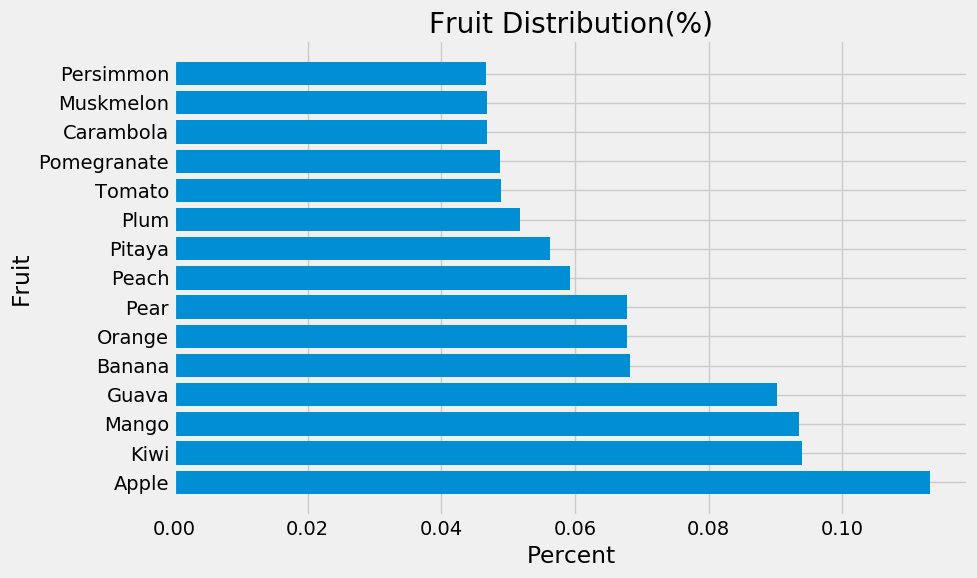

In [191]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
plt.barh(list(fruit_counts.keys()), list(fruit_counts.values()))
plt.xlabel('Percent')
plt.ylabel('Fruit')
plt.title('Fruit Distribution(%)')
plt.tight_layout()
plt.savefig('Images/fruit_dist_dark.png')

## Exploring Model Predictions

In [97]:
true_label_spread = dict(predictions.Actual.value_counts(normalize=True))

predicted_label_spread = dict(predictions.Predicted.value_counts(normalize=True))

Combining the values into a dict so that the indices match

In [130]:
df_dict = {}
for k in true_label_spread:
    df_dict[k] = (true_label_spread[k], predicted_label_spread[k])

Getting the true and predicted label percentages of each

In [152]:
true_labels = []
predicted_labels = []
for key in df_dict.keys():
    true_labels.append(df_dict[key][0])
    predicted_labels.append(df_dict[key][1])

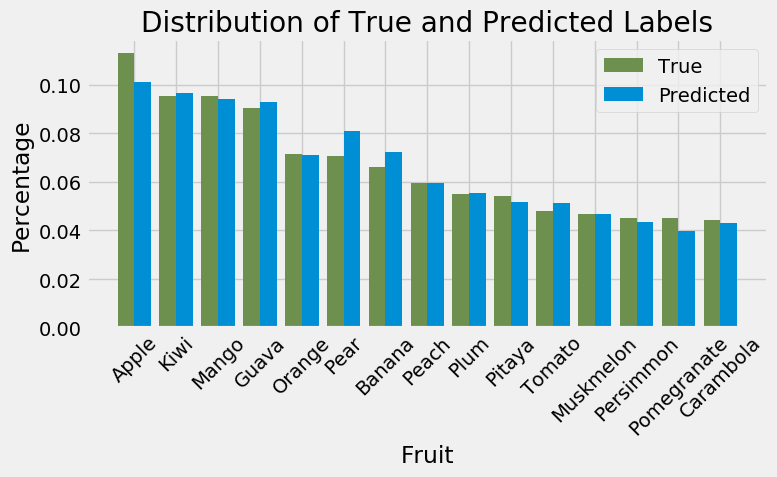

In [190]:
plt.style.use('fivethirtyeight')
n = 15
ind = np.arange(n) 
width = 0.4
plt.figure(figsize=(8,5))
plt.bar(ind, true_labels, width, label='True', color='C3')
plt.bar(ind + width, predicted_labels, width, label='Predicted', color='C0')
plt.xticks(ind + width / 2, list(df_dict.keys()), rotation=45)
plt.ylabel('Percentage')
plt.xlabel('Fruit')
plt.title('Distribution of True and Predicted Labels')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('Images/true_pred_spread_dark.png')